In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce.csv')
df.head()

,Order_Date,Time,Age,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,MKTG_Channel
0,2018-01-02,10:56:33,36,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,Email
1,2018-07-24,20:41:37,54,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,Youtube
2,2018-11-08,08:38:49,32,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,Email
3,2018-04-18,19:28:06,43,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,Organic
4,2018-08-13,21:18:39,48,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,Youtube


In [5]:
# Checking for Null Values & Dropping rows with null values
df.isnull().sum()
df = df.dropna()

Order_Date             0
Time                   0
Age                    0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         0
Payment_method         0
MKTG_Channel           0
dtype: int64

In [13]:
# Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51283 entries, 0 to 51289
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51283 non-null  datetime64[ns]
 1   Time                 51283 non-null  object        
 2   Age                  51283 non-null  int64         
 3   Customer_Id          51283 non-null  int64         
 4   Gender               51283 non-null  object        
 5   Device_Type          51283 non-null  object        
 6   Customer_Login_type  51283 non-null  object        
 7   Product_Category     51283 non-null  object        
 8   Product              51283 non-null  object        
 9   Sales                51283 non-null  float64       
 10  Quantity             51283 non-null  float64       
 11  Discount             51283 non-null  float64       
 12  Profit               51283 non-null  float64       
 13  Shipping_Cost        51283 non-null 

In [7]:
# Exploratory Data Analysis
df.describe()

,Age,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51283.000000,51283.000000,51283.000000,51283.000000,51283.000000,51283.000000,51283.000000
mean,41.427881,58159.120683,152.337110,2.502935,0.303838,70.401511,7.041138
std,13.885263,26031.895346,66.491842,1.511834,0.131023,48.727699,4.871642
min,18.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,29.000000,35838.000000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,41.000000,61021.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,53.000000,80738.500000,218.000000,4.000000,0.400000,118.400000,11.800000
max,65.000000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


In [11]:
# Count of unique customers
unique_customers = df['Customer_Id'].nunique()
print("Number of unique customers: "unique_customers)

Number of unique customers:  38990


In [12]:
# Changing Order Date Column to "datetime" type
from datetime import datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [17]:
# Calculating Recency Value
df['Recency'] = (pd.to_datetime('now') - df['Order_Date']).dt.days


In [19]:
#Calculating Frequency Value
frequency_data = df.groupby('Customer_Id')['Quantity'].count().reset_index()
frequency_data.rename(columns={'Quantity': 'Frequency'}, inplace = True)
df = df.merge(frequency_data, on = 'Customer_Id', how = 'left')

In [21]:
# Calculating Monetary Value
monetary_data = df.groupby('Customer_Id')['Sales'].sum().reset_index()
monetary_data.rename(columns={'Sales': 'Monetary_Value'}, inplace = True)
df = df.merge(monetary_data, on = 'Customer_Id', how = 'left')

In [24]:
# Viewing each customers monetary value
customer_spent = df.groupby('Customer_Id')['Monetary_Value'].sum().sort_values(ascending=False)
print(customer_spent)

Customer_Id
95831    5364.0
87989    4970.0
35324    4745.0
79016    4675.0
87539    4420.0
          ...  
59648      33.0
46233      33.0
33177      33.0
40079      33.0
42202      33.0
Name: Monetary_Value, Length: 38990, dtype: float64


In [26]:
# Calculating RFM Scores
recency_scores = [5, 4, 3, 2, 1] 
# A scale from 1 to 5, where 5 is the highest (most recent) and 1 is the lowest.
# Higher for customers with more recent interactions

frequency_scores = [1, 2, 3, 4, 5] 
# A scale from 1 to 5, where 1 is the lowest frequency and 5 is the highest.
# Higher for customers with more higher purchase frequency.

monetary_scores = [1, 2, 3, 4, 5] 
# A scale from 1 to 5, where 1 is the lowest monetary value and 5 is the highest.
# Higher for customers who spend more money.


# The code below divides the scores into five equal bins
df['RecencyScore'] = pd.cut(df['Recency'], bins = 5, labels= recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins = 5, labels= frequency_scores)
df['MonetaryScore'] = pd.cut(df['Monetary_Value'], bins= 5, labels= monetary_scores)

In [28]:
# Convert RFM scores to numeric type
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

In [29]:
# Calculating each customers RFM Score by adding recency, frequency and monetary scores
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Splitting the RFM scores of the customers into 3 quantiles, "Low Value", "Mid Value" and "High Value"
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q= 3, labels= segment_labels)

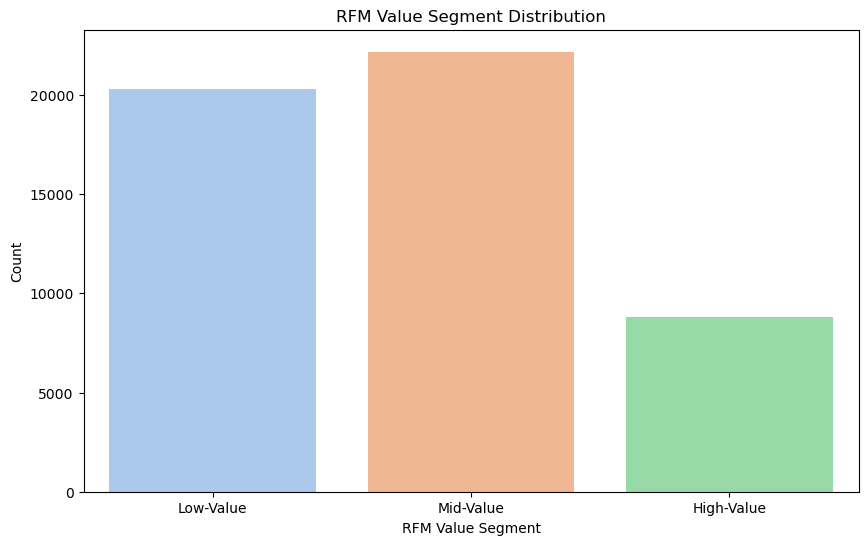

In [31]:
# Visualizing Each Segment 

segment_counts = df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = sns.color_palette('pastel')

plt.figure(figsize=(10,6))
sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)

plt.title('RFM Value Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')

plt.show()

In [32]:
# Creating a new column that divides the customers to different segments based on their RFM Scores.
# Ranges from "Champions" to "Lost", where "Champions" have a 9+ RFM score, and "Lost" have an RFM score of between 3 and 4.

df['RFM Customer Segments'] = ''

df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At-Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = 'Cannot Lose'
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = 'Lost'

In [33]:
df.head()

,Order_Date,Time,Age,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,...,MKTG_Channel,Recency,Frequency,Monetary_Value,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,2018-01-02,10:56:33,36,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,...,Email,2187,1,140.0,1,1,1,3,Low-Value,Lost
1,2018-07-24,20:41:37,54,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,...,Youtube,1984,1,211.0,3,1,1,5,Low-Value,At-Risk Customers
2,2018-11-08,08:38:49,32,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,...,Email,1877,1,117.0,5,1,1,7,Mid-Value,Potential Loyalists
3,2018-04-18,19:28:06,43,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,...,Organic,2081,1,118.0,2,1,1,4,Low-Value,Cannot Lose
4,2018-08-13,21:18:39,48,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,...,Youtube,1964,1,250.0,4,1,2,7,Mid-Value,Potential Loyalists


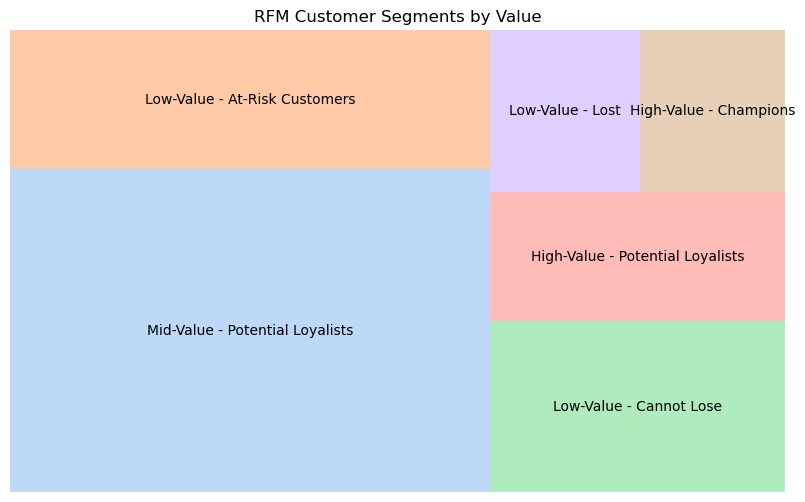

In [37]:
# Plotting the distribution of customers across several RFM segments  within each value segment

segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name = 'Count')
segment_product_counts = segment_product_counts.sort_values('Count', ascending= False)
segment_product_counts = segment_product_counts[segment_product_counts['Count'] > 1]

!pip install squarify
import squarify 
plt.figure(figsize=(10,6))

squarify.plot(sizes = segment_product_counts['Count'],
              label = segment_product_counts.apply(lambda x: f"{x['Value Segment']} - {x['RFM Customer Segments']}", axis= 1),
              color = pastel_colors, 
              alpha = 0.7)

plt.title('RFM Customer Segments by Value')
plt.axis('off')
plt.show()

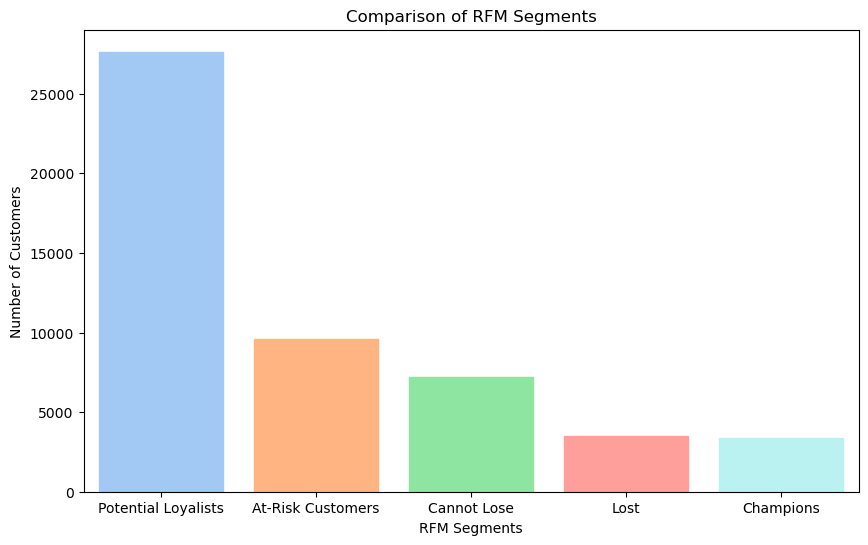

In [38]:
# The total number of customers in each segment

segment_counts = df['RFM Customer Segments'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x = segment_counts.index, y=segment_counts.values, palette= 'pastel')

champions_color = pastel_colors[9]
colors = [champions_color if segment == 'Champions' else pastel_colors[i] for i, segment in enumerate(segment_counts.index)]
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')

ax.yaxis.grid(False)

plt.show()

# Recommendations

Based on the analysis, majority of customers for this ecommerce store have low value and mid value RFM scores. Further segmentation also shows majority of the customers have the potential to be a loyalists, therefore it could prove vital in creating targetted marketing campaigns. 

Additionally, the "At-Risk" and "Cannot Lose" Customer segments can be targetted with customer retention programs.